In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import seaborn

import warnings
warnings.filterwarnings('ignore')

print(os.listdir('../data/car_distance/'))

['test.tsv', 'output', 'train.tsv', '.ipynb_checkpoints', 'sample_submit.csv']


In [2]:
df_train = pd.read_csv('../data/car_distance/train.tsv', delimiter='\t')
df_test = pd.read_csv('../data/car_distance/test.tsv', delimiter='\t')
print(df_train.shape, df_test.shape)

(199, 10) (199, 9)


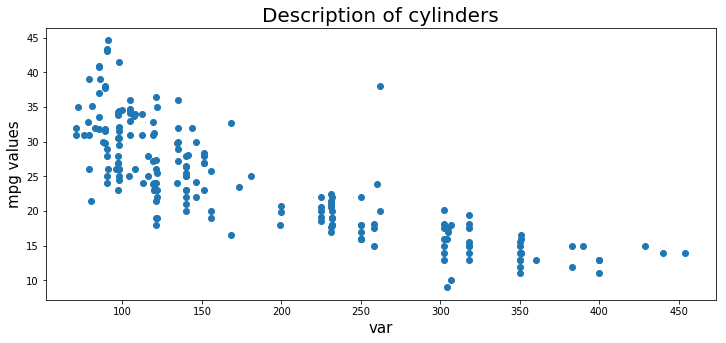

In [3]:
plt.figure(figsize=(12, 5))
plt.scatter(x='displacement', y='mpg', data=df_train,)
plt.title('Description of cylinders', fontsize=20)
plt.xlabel('var', fontsize=15)
plt.ylabel('mpg values', fontsize=15)

plt.show()

In [4]:
df_train.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel


In [5]:
df_train['horsepower'][df_train['horsepower']=='?'] = df_train[df_train['horsepower'] != '?'].median()
df_test['horsepower'][df_test['horsepower']=='?'] = df_test[df_test['horsepower'] != '?'].median()

df_train['horsepower'] = df_train['horsepower'].fillna('90')
df_test['horsepower'] = df_test['horsepower'].fillna('90')

df_train['horsepower'] = df_train['horsepower'].astype(np.float)
df_test['horsepower'] = df_test['horsepower'].astype(np.float)

df_train.drop(df_train[(df_train['mpg'] > 30) & (df_train['horsepower'] == 132)].index, inplace=True)

df_train['goukei'] = df_train['cylinders'] + df_train['horsepower'] * df_train['acceleration']
df_test['goukei'] = df_test['cylinders'] + df_test['horsepower'] * df_test['acceleration']

df_train['old'] = df_train['origin'] + df_train['model year']
df_test['old'] = df_test['origin'] + df_test['model year']

df_train['new'] = df_train['displacement'] + df_train['acceleration']
df_test['new'] = df_test['displacement'] + df_test['acceleration'] 


df_train.drop(df_train[(df_train['goukei'] > 2900) & (df_train['goukei'] < 3200) & (df_train['mpg'] < 15 )].index, inplace=True)
df_train.drop(df_train[(df_train['goukei'] > 3500) & (df_train['goukei'] < 4000) & (df_train['mpg'] < 15 )].index, inplace=True)
df_train.drop(df_train[(df_train['goukei'] > 1500) & (df_train['goukei'] < 1700) & (df_train['mpg'] > 35 )].index, inplace=True)
df_train.drop(df_train[(df_train['new'] > 250) & (df_train['new'] < 300) & (df_train['mpg'] > 35)].index, inplace=True)
df_train.drop(df_train[(df_train['model year'] == 78)  & (df_train['mpg'] > 40)].index, inplace=True)
df_train.drop(df_train[(df_train['model year'] == 71) & (df_train['mpg'] > 34)].index, inplace=True)
df_train.drop(df_train[(df_train['model year'] == 80) & (df_train['mpg'] < 20)].index, inplace=True)
df_train.drop(df_train[(df_train['old'] == 74) & (df_train['mpg'] > 30)].index, inplace=True)
df_train.drop(df_train[(df_train['old'] == 76) & (df_train['mpg'] > 30)].index, inplace=True)
df_train.drop(df_train[(df_train['old'] == 84) & (df_train['mpg'] < 30)].index, inplace=True)
df_train.drop(df_train[(df_train['old'] == 77) & (df_train['mpg'] < 15)].index, inplace=True)

interval = (0, 99, 150, 300)
labels = ['first', 'second', 'third']

df_train['horsepower'] = pd.cut(df_train['horsepower'], interval, labels=labels)
df_test['horsepower'] = pd.cut(df_test['horsepower'], interval, labels=labels)

interval = (0, 100, 180, 300)
label = ['first', 'second', 'third']

df_train['old'] = pd.cut(df_train['old'], interval, labels=labels)
df_test['old'] = pd.cut(df_test['old'], interval, labels=labels)

interval = (1600, 2220, 2710, 3430, 6000)
labels = ['first', 'second', 'third' , 'forth']

df_train['weight'] = pd.cut(df_train['weight'], interval, labels=labels)
df_test['weight'] = pd.cut(df_test['weight'], interval, labels=labels)

interval = (0, 13, 20, 30)
labels = ['first', 'second', 'third']

df_train['acceleration'] = pd.cut(df_train['acceleration'], interval, labels=labels)
df_test['acceleration'] = pd.cut(df_test['acceleration'], interval, labels=labels)

In [6]:
Drop = ['car name']

df_train.drop(Drop, axis=1, inplace=True)
df_test.drop(Drop, axis=1, inplace=True)

#df_train.drop(['acceleration'], axis=1, inplace=True)
#df_test.drop(['acceleration'], axis=1, inplace=True)

interval = (0, 125, 300)
labels = ['first', 'second']

df_train['horsepower'] = pd.cut(df_train['horsepower'], interval, labels=labels)
df_test['horsepower'] = pd.cut(df_test['horsepower'], interval, labels=labels)

interval = (0, 11, 30)
labels = ['first', 'second']

df_train['acceleration'] = pd.cut(df_train['acceleration'], interval, labels=labels)
df_test['acceleration'] = pd.cut(df_test['acceleration'], interval, labels=labels)

In [7]:
columns = ['origin', 'cylinders', 'model year']

df_train = pd.get_dummies(df_train, columns=columns, prefix=columns, drop_first=True)
df_test = pd.get_dummies(df_test, columns=columns, prefix=columns, drop_first=True)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing as prepro
from keras.layers.recurrent import LSTM
from keras.wrappers.scikit_learn import KerasRegressor
sc = StandardScaler()
mm = MinMaxScaler()

Using TensorFlow backend.


In [9]:
df_train.head()

,id,mpg,displacement,horsepower,weight,acceleration,origin_2,origin_3,cylinders_4,cylinders_5,...,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82
0,0,29.0,135.0,84.0,2525.0,16.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,3,31.9,89.0,71.0,1925.0,14.0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,9,19.0,156.0,108.0,2930.0,15.5,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,11,28.0,90.0,75.0,2125.0,14.5,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,13,37.7,89.0,62.0,2050.0,17.3,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
train = df_train.drop(['id', 'mpg'], axis=1)
train_ = df_train['mpg']
test = df_test.drop(['id'], axis=1)

#X_train = prepro.PolynomialFeatures(include_bias=False).fit_transform(train)
#y_train = train_.values
#X_test = prepro.PolynomialFeatures(include_bias=False).fit_transform(test)

X_train = train.values.astype(np.float32)
y_train = train_.values.astype(np.float32) / 10
X_test = test.values.astype(np.float32)

print(X_train.shape, y_train.shape, X_test.shape)

(198, 22) (198,) (199, 22)


In [17]:
model = Sequential()

model.add(Dense(200, activation='relu', input_dim=22, kernel_initializer='uniform'))
model.add(Dropout(0.4))
model.add(Dense(20*100, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.4))
#model.add(Dense(275, activation='relu', kernel_initializer='uniform'))
#model.add(Dropout(0.3))
#model.add(Dense(100, activation='relu', kernel_initializer='uniform'))
model.add(Dense(1))
#model.add(Dropout(0.3))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 200)               4600      
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2000)              402000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 2001      
Total params: 408,601
Trainable params: 408,601
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer=Adam(), loss='mae', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1, shuffle=True)
print(history.history.keys())

scores = model.evaluate(X_train, y_train, batch_size=30)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

Train on 158 samples, validate on 40 samples
Epoch 1/100
158/158 [==============================] - 1s 4ms/step - loss: 73.0941 - mean_absolute_error: 73.0941 - val_loss: 53.9062 - val_mean_absolute_error: 53.9062
Epoch 2/100
158/158 [==============================] - 0s 1ms/step - loss: 28.5321 - mean_absolute_error: 28.5321 - val_loss: 20.5175 - val_mean_absolute_error: 20.5175
Epoch 3/100
158/158 [==============================] - 0s 1ms/step - loss: 22.9587 - mean_absolute_error: 22.9587 - val_loss: 5.2627 - val_mean_absolute_error: 5.2627
Epoch 4/100
158/158 [==============================] - 0s 1ms/step - loss: 13.0603 - mean_absolute_error: 13.0603 - val_loss: 11.6869 - val_mean_absolute_error: 11.6869
Epoch 5/100
158/158 [==============================] - 0s 1ms/step - loss: 10.2487 - mean_absolute_error: 10.2487 - val_loss: 2.0456 - val_mean_absolute_error: 2.0456
Epoch 6/100
158/158 [==============================] - 0s 1ms/step - loss: 7.9717 - mean_absolute_error: 7.9717 - 

158/158 [==============================] - 0s 1ms/step - loss: 0.6537 - mean_absolute_error: 0.6537 - val_loss: 0.6615 - val_mean_absolute_error: 0.6615
Epoch 51/100
158/158 [==============================] - 0s 1ms/step - loss: 0.6594 - mean_absolute_error: 0.6594 - val_loss: 0.6567 - val_mean_absolute_error: 0.6567
Epoch 52/100
158/158 [==============================] - 0s 1ms/step - loss: 0.6422 - mean_absolute_error: 0.6422 - val_loss: 0.6567 - val_mean_absolute_error: 0.6567
Epoch 53/100
158/158 [==============================] - 0s 2ms/step - loss: 0.6405 - mean_absolute_error: 0.6405 - val_loss: 0.6577 - val_mean_absolute_error: 0.6577
Epoch 54/100
158/158 [==============================] - 0s 1ms/step - loss: 0.6391 - mean_absolute_error: 0.6391 - val_loss: 0.6592 - val_mean_absolute_error: 0.6592
Epoch 55/100
158/158 [==============================] - 0s 1ms/step - loss: 0.6568 - mean_absolute_error: 0.6568 - val_loss: 0.6568 - val_mean_absolute_error: 0.6568
Epoch 56/100
158/

158/158 [==============================] - 0s 2ms/step - loss: 0.6508 - mean_absolute_error: 0.6508 - val_loss: 0.6573 - val_mean_absolute_error: 0.6573
Epoch 100/100
158/158 [==============================] - 0s 1ms/step - loss: 0.6475 - mean_absolute_error: 0.6475 - val_loss: 0.6576 - val_mean_absolute_error: 0.6576
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])
198/198 [==============================] - 0s 121us/step
mean_absolute_error: 64.64%


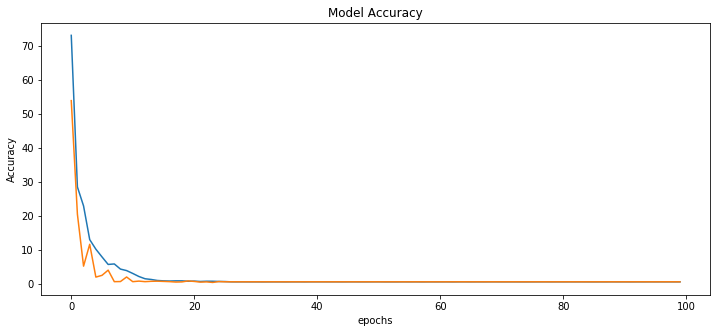

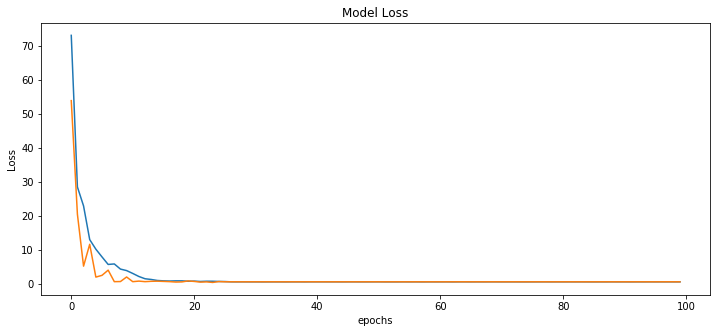

In [19]:
def display():
    """This function display history of acc and loss.
    returns: two figures.
    """
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['mean_absolute_error'])
    plt.plot(history.history['val_mean_absolute_error'])
    plt.title('Model Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.show()
display()

In [20]:
predict = model.predict(X_test)
predict = predict * train_.mean()
df_out = pd.read_csv('../data/car_distance/test.tsv', delimiter='\t')
df_out['mpg'] = predict

df_out[['id', 'mpg']].to_csv('../data/car_distance/output/deep_new.csv', index=False, header=False)

In [1]:
a = pd.read_csv('../data/movie/sample_submission.csv')
a

NameError: name 'pd' is not defined